## Importing necessary modules

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

2025-08-26 10:25:58.857758: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 10:25:58.887236: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-26 10:25:59.922461: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Loading the dataset

In [3]:
# Loading  the data and keeping only the top 10,000 most frequent words
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print(f"Number of training samples: {len(x_train)}")
print(f"Number of test samples: {len(x_test)}")
print(f"Example review (word indices): {x_train[0][:10]}")
print(f"Example label: {y_train[0]}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Number of training samples: 25000
Number of test samples: 25000
Example review (word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
Example label: 1


## Setting up padding to keep the model stable

In [4]:
max_len = 100  # max length for all reviews

x_train_padded = pad_sequences(x_train, maxlen=max_len, padding='pre', truncating='pre')
x_test_padded = pad_sequences(x_test, maxlen=max_len, padding='pre', truncating='pre')

print(f"Padded training review shape: {x_train_padded.shape}")
print(f"Example padded review: {x_train_padded[0]}")

Padded training review shape: (25000, 100)
Example padded review: [1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117 5952   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
 7486   18    4  226   22   21  134  476   26  480    5  144   30 5535
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16 5345   19
  178   32]


## Building the model

In [5]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

/home/ai-a3/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-08-26 10:31:55.490137: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training the model for 5 epochs

In [7]:
history = model.fit(
    x_train_padded, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6713 - loss: 0.5842 - val_accuracy: 0.7984 - val_loss: 0.4455
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8626 - loss: 0.3315 - val_accuracy: 0.8180 - val_loss: 0.4095
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9268 - loss: 0.1952 - val_accuracy: 0.8342 - val_loss: 0.4172
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9721 - loss: 0.0865 - val_accuracy: 0.8194 - val_loss: 0.6011
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9906 - loss: 0.0361 - val_accuracy: 0.8150 - val_loss: 0.6083


## Since model has overfitted, a regularization technique is implemented.

In [8]:
model_improved = Sequential()
model_improved.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model_improved.add(SimpleRNN(32, dropout=0.2))
model_improved.add(Dense(1, activation='sigmoid'))

# Compile model
model_improved.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history_improved = model_improved.fit(
    x_train_padded, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5


/home/ai-a3/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5933 - loss: 0.6613 - val_accuracy: 0.7762 - val_loss: 0.4889
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8159 - loss: 0.4120 - val_accuracy: 0.8134 - val_loss: 0.4407
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8983 - loss: 0.2577 - val_accuracy: 0.8352 - val_loss: 0.4080
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9456 - loss: 0.1519 - val_accuracy: 0.8272 - val_loss: 0.4784
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9685 - loss: 0.0928 - val_accuracy: 0.8100 - val_loss: 0.5355


## Testing on unseen data

In [9]:
test_loss, test_acc = model_improved.evaluate(x_test_padded, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8066 - loss: 0.5494
Test Accuracy: 0.8066


## Visualizing validation and accuracy loss

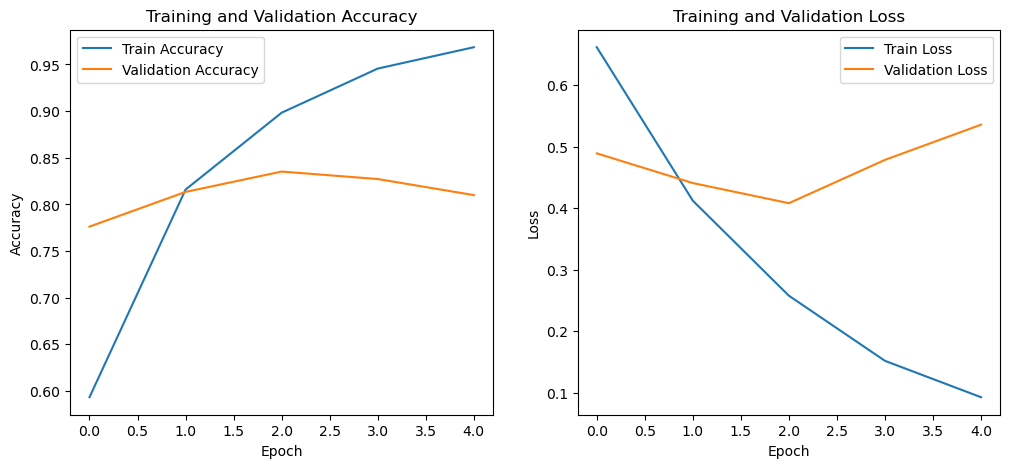

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
